## Importing the Libraries

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting the style of matplotlib
plt.style.use("fivethirtyeight")

# code to ignore warnings
import warnings 
warnings.filterwarnings("ignore")

## Importing the data

In [6]:
# importing the data

df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Converting the column names to lower and changing the spaces to underscore


In [ ]:
#Converting the column names to lower and changing the spaces to underscore
df.columns = df.columns.str.lower().str.replace(' ','_')

### checking the data-types of each feature


In [12]:
#checking the data-types of each feature
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

### shape of Dataset

In [13]:
# shape of dataset
df.shape

(9994, 13)

### count of each feature


In [15]:
#count of each feature
df.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

### Checking the null values

In [16]:
#checking if any feature has null or na values
df.isnull().sum()



Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Describing the dataset

In [17]:
# Describing the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### List of numerical features

In [23]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,postal_code,sales,quantity,discount,profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


### Discreet Feature Count

In [24]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


### Relationship between the discreet features and profit

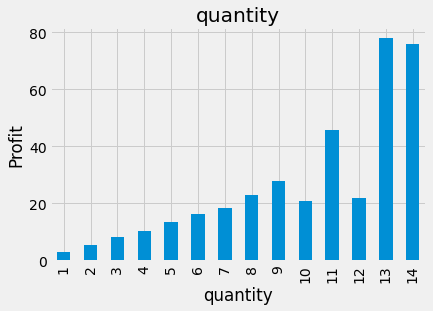

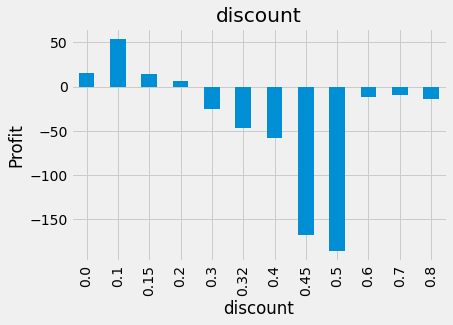

In [27]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['profit'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plt.show()

Above graphs demostrate that the more  quantity person has the more profit he makes and the more discount he gives the less profit he makes


### Continuos Features

In [33]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature and feature != 'profit' and feature !='postal_code']
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1


### Relationship between continuos feature and profit

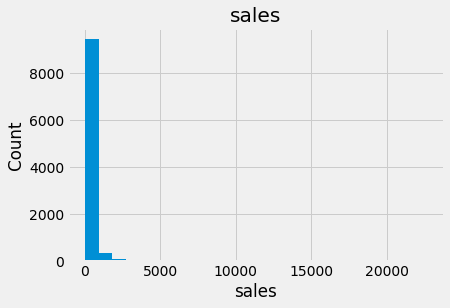

In [34]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


### Categorical Features

In [35]:
#Categorical Features

categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['ship_mode',
 'segment',
 'country',
 'city',
 'state',
 'region',
 'category',
 'sub-category']

In [36]:
# view the top 5 values of dataset
df[categorical_features].head()

,ship_mode,segment,country,city,state,region,category,sub-category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


### List of categorical Features and their count

In [38]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is ship_mode and number of categories are 4
The feature is segment and number of categories are 3
The feature is country and number of categories are 1
The feature is city and number of categories are 531
The feature is state and number of categories are 49
The feature is region and number of categories are 4
The feature is category and number of categories are 3
The feature is sub-category and number of categories are 17


### Removing the feature

In [44]:
# Now we are removing some items in categorical features as they are not important for EDA

categorical_features.remove("country")
categorical_features.remove("city")

### Relationship between categorical features and profit

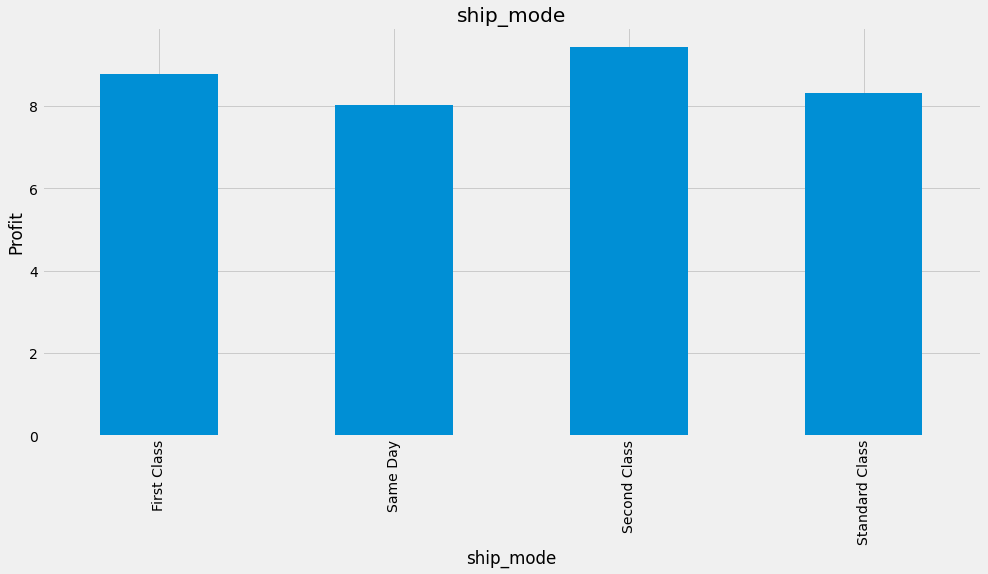

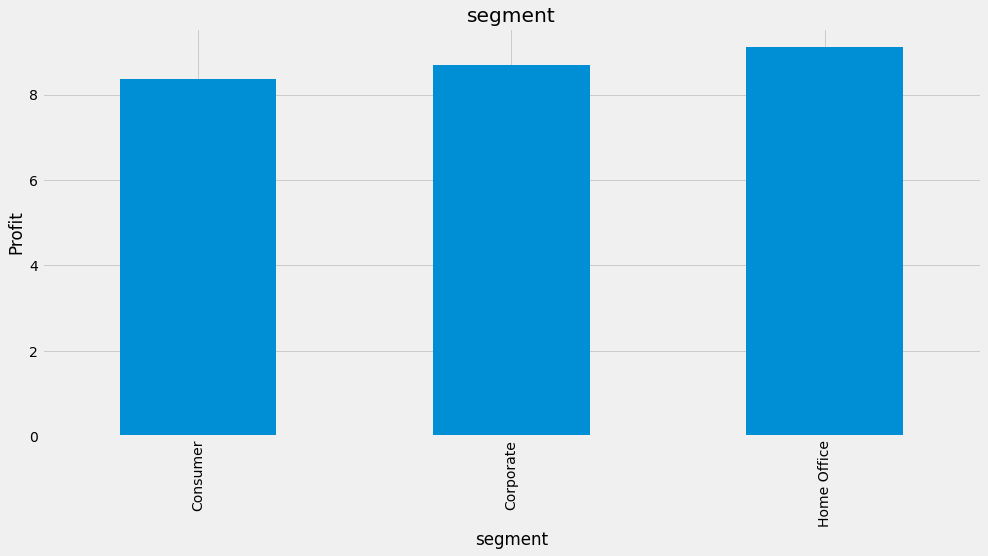

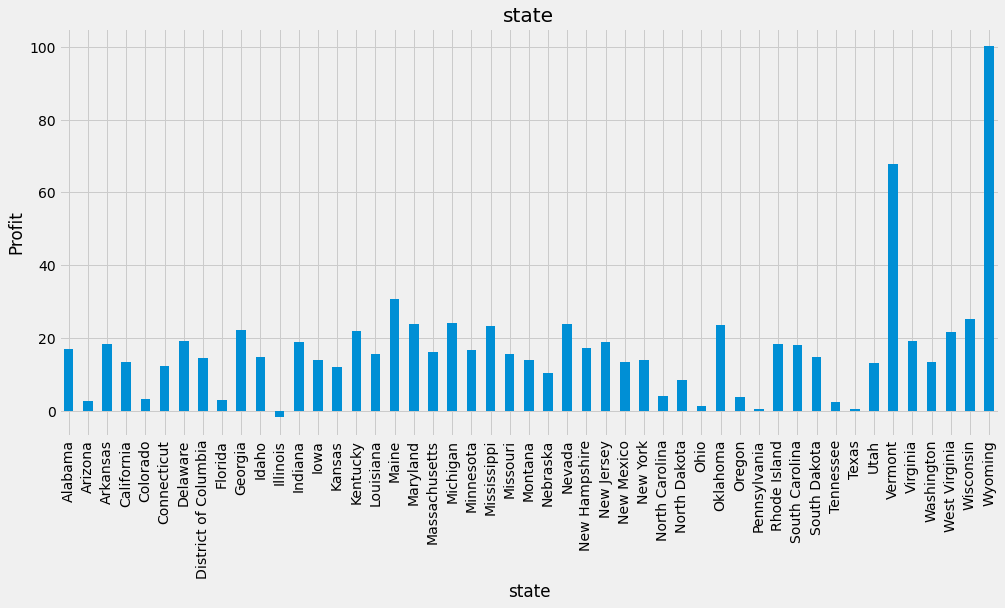

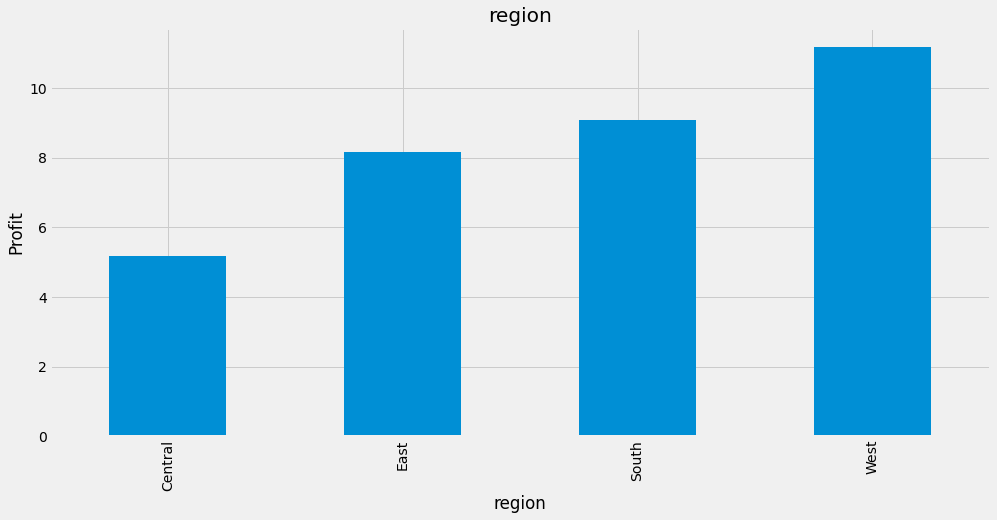

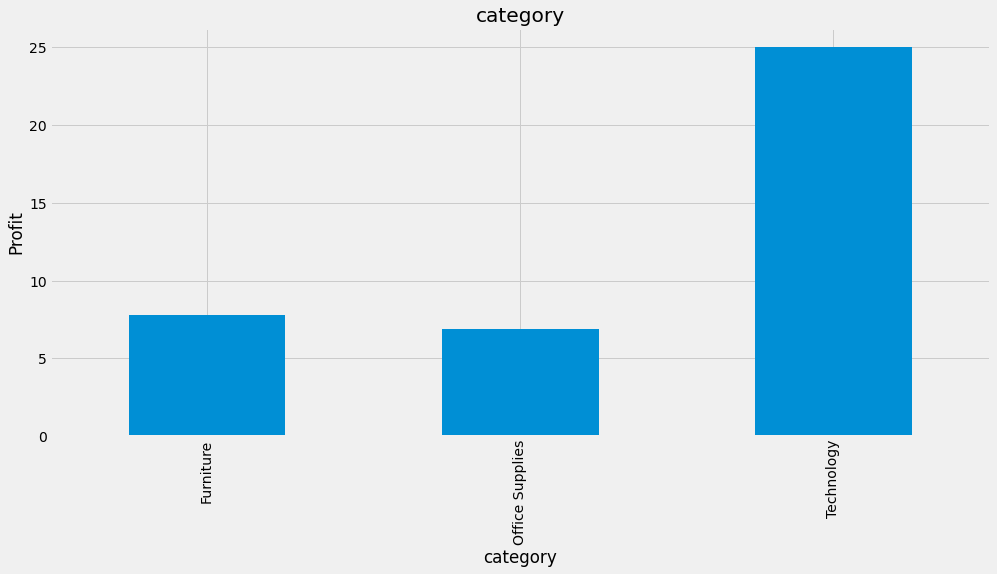

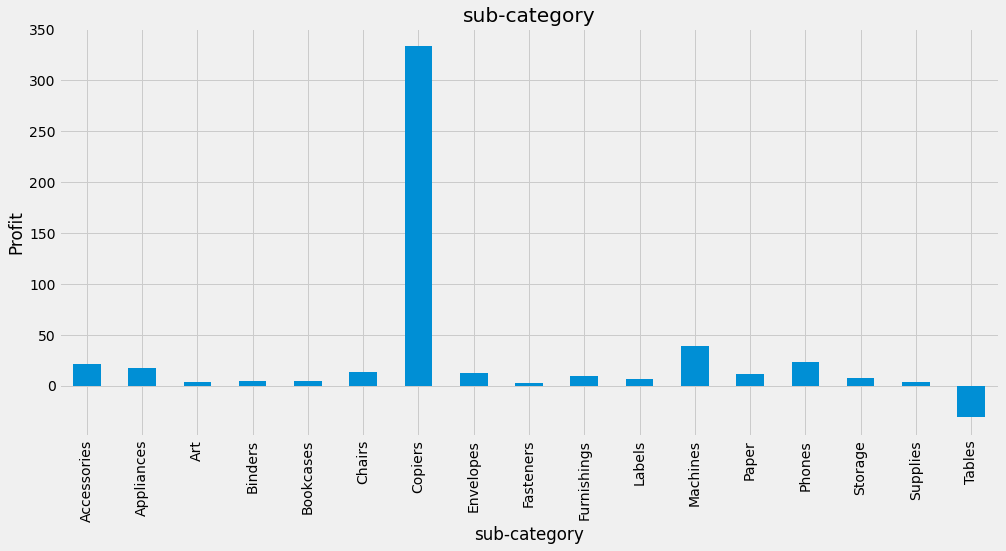

In [46]:
for feature in categorical_features:
    data=df.copy()
    plt.figure(figsize=(15,7))
    data.groupby(feature)['profit'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plt.show()

## Information on seeing above graphs 
 - ship mode transpost made almost equal profits
 - Vermont and Wyoming making good profit while the illionis is in loss
 - West region is most profitable while central region needs some work done
 - Technlogy equipments category making the most profit while furniture and office supplies need to work hard
 - In sub-category, copier makes all the profit while tables is in loss

### Sales and profit graph according to ship mde and category

<AxesSubplot:xlabel='ship_mode,category'>

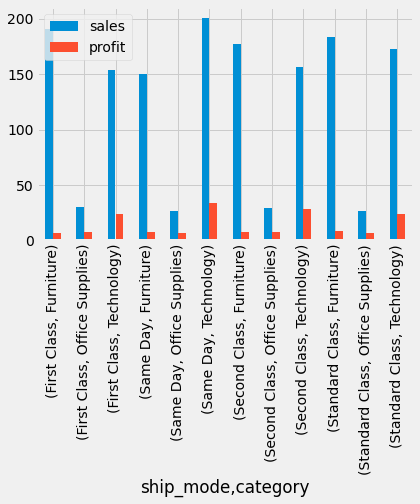

In [52]:
ab = df.groupby(['ship_mode', 'category'])['sales', 'profit'].median()
ab.plot.bar()

### Finding the relationship between features

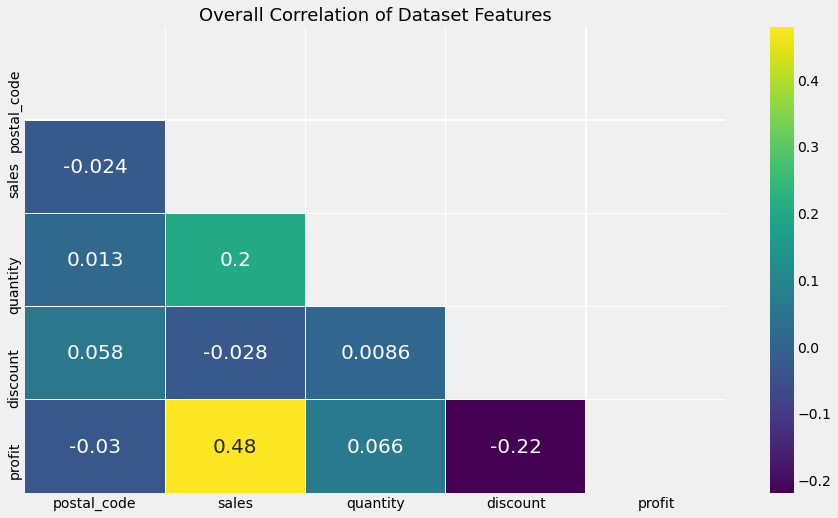

In [58]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14, 8))

plt.title('Overall Correlation of Dataset Features', fontsize=18)

sns.heatmap(corr, mask=mask, annot=True,cmap='viridis', linewidths=0.2, annot_kws={'size':20})
plt.show()

# Conclusions

- The more the quantity the more the profit
- Illinois state has not performing well, good amount of buisness can be come out of that state
- sales is directly proportional to profit
- second class shipment provides a little more profit
- Vermont and Wyoming buisness strategies should be applied on various states as well
- Techonlogical equipment is working fine but need working on the other categories
- Copiers is the item that make the most profit